<a href="https://colab.research.google.com/github/mandyzach/transformers_pub/blob/main/Copy_of_Sphere_Transformers_Class_by_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Oc5Myu--_5ZWIn_EX7M7sHDMbIo_Eb34)


## Sphere Transformers Class Day 1 (Pretrain) - Overview Notebook

This notebook is a self-contained way to start using transformers. 

- For additional notebooks:
  - The [**official transformers notebooks**](https://huggingface.co/docs/transformers/notebooks).
  - Julien's Amazon Shoe review [notebooks](https://gitlab.com/juliensimon/huggingface-demos/-/tree/main/amazon-shoes).
  - Niels [Transformers Tutorials](https://github.com/NielsRogge/Transformers-Tutorials).
  - Philipp's [blog](https://www.philschmid.de/).

**Learning goals:** The goal of this tutorial is to learn How To

1. Use pre-trained pipelines
2. Get embeddings
3. Build a multimodal models

**Steps to Do:** How to best use this notebook

1. Make a copy of this notebook, so you can keep your changes



In [ ]:
%pip install --quiet transformers datasets sentence-transformers

#Exploring Tasks at Hugging Face Hub on the Web:
[Hugging Face Tasks](https://hf.co/tasks) 

---

[Automated Speech Recognition](https://huggingface.co/tasks/automatic-speech-recognition)

[Object Detection](https://huggingface.co/tasks/object-detection)

[Summarization](https://huggingface.co/tasks/summarization)


#Pre-Trained Models with Pipelines -> ✨ Easy Mode ✨

The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) supports many 20+ common tasks out-of-the-box:

**Text**:
* Sentiment analysis: classify the polarity of a given text.
* Text generation (in English): generate text from a given input.
* Name entity recognition (NER): label each word with the entity it represents (person, date, location, etc.).
* Question answering: extract the answer from the context, given some context and a question.

**Image**:
* Image classification: classify an image.
* Image segmentation: classify every pixel in an image.
* Object detection: detect objects within an image.

**Audio**:
* Audio classification: assign a label to a given segment of audio.
* Automatic speech recognition (ASR): transcribe audio data into text.

**MultiModal**:
* Visual Question Answering: answers open-ended questions about images
* Image To Text: predicts a caption for a given image

###Text

#### Sentiment Analysis

In [ ]:
from transformers import pipeline
sent_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_classifier("I am sad about today")

[{'label': 'NEGATIVE', 'score': 0.9962730407714844}]

#### Text Generation

If you want to see what other tasks are available, check out all the [pipeline tasks](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#the-task-specific-pipelines) in the docs.

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
generator("Once upon a time,")

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': "Once upon a time, the two of them might have been rivals in fighting for possession of a place in the final three when they met with their respective teams. We've already seen this relationship developed with Barcelona in the past.\n\nThis is not"}]

In [ ]:
generator("In this course, we will teach you how to")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to navigate and analyze your own environment and its behaviors through the use of Google APIs and real-time visualization. Topics will cover the following:\n\nReal-time visualization\n\nWeb application development\n\n'}]

###Image

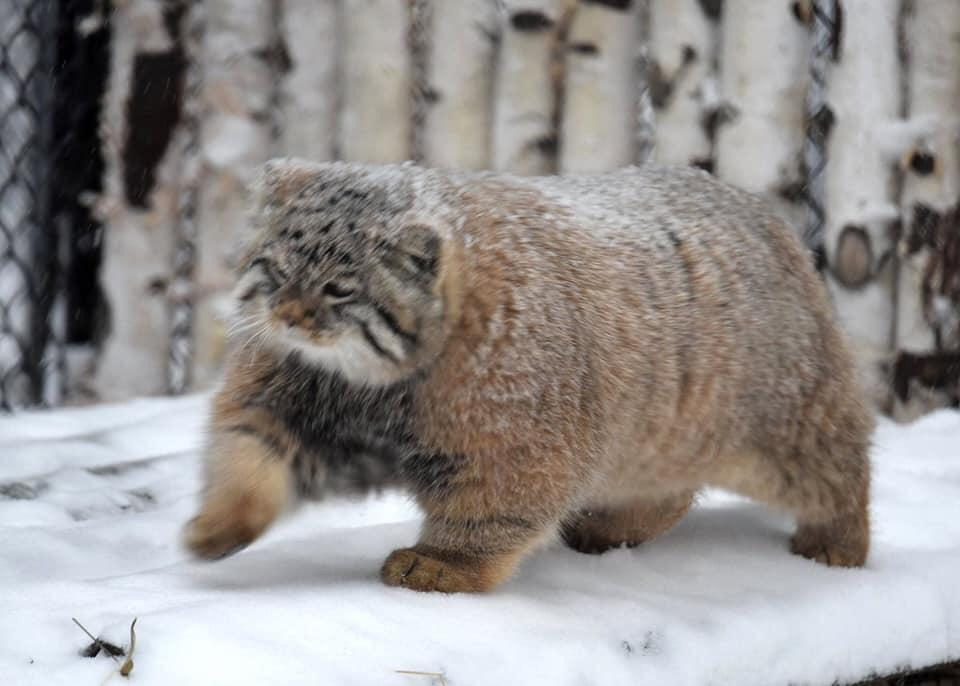

In [ ]:
from IPython.display import Image
Image('https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg')

In [ ]:
vision_classifier = pipeline(task="image-classification")
imagepic="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
result = vision_classifier(
    images=imagepic
)
print("\n".join([f"Class {d['label']} with score {round(d['score'], 4)}" for d in result]))

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Class lynx, catamount with score 0.4403
Class cougar, puma, catamount, mountain lion, painter, panther, Felis concolor with score 0.0343
Class snow leopard, ounce, Panthera uncia with score 0.0321
Class Egyptian cat with score 0.0235
Class tiger cat with score 0.023


### MultiModal

In [ ]:
from transformers import AutoModelForVisualQuestionAnswering
vqa_pipeline = pipeline("visual-question-answering")
vqa = vqa_pipeline(image=imagepic,
                   question = "What is the weather like")
                  #question = "What color are the bushes")
vqa

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.9079471230506897, 'answer': 'snowy'},
 {'score': 0.8918493390083313, 'answer': 'cold'},
 {'score': 0.17045751214027405, 'answer': 'snow'},
 {'score': 0.1665184646844864, 'answer': 'snowing'},
 {'score': 0.1090196892619133, 'answer': 'winter'}]

If you are doing this solo, code up another task here (hint, check out the [tasks](https://huggingface.co/tasks) or [docs](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) if need a shortcut).

How about a question/answer model?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import pipeline
from PIL import Image

pipe = pipeline("document-question-answering", model="naver-clova-ix/donut-base-finetuned-docvqa")

question = "What is the purchase amount?"
image = Image.open("invoice2")

pipe(image=image, question=question)


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'answer': 'ag0.00'}]

#Embeddings from Pre-Trained Models

### Image embeddings using [Distilled data-efficient Image Transformer (DeiT)](https://huggingface.co/facebook/deit-base-distilled-patch16-224)

In [ ]:
from PIL import Image
import requests
im = Image.open(requests.get(imagepic, stream=True).raw)

In [ ]:
from transformers import AutoFeatureExtractor
feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-base-distilled-patch16-224')
embeddings = feature_extractor(images=im, return_tensors="pt")
embeddings


/usr/local/lib/python3.9/dist-packages/transformers/models/deit/feature_extraction_deit.py:28: FutureWarning: The class DeiTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DeiTImageProcessor instead.
  warnings.warn(


{'pixel_values': tensor([[[[-1.9980, -2.0665, -2.1008,  ...,  0.8618,  0.4166, -0.2513],
          [-1.9638, -2.0665, -2.1179,  ...,  0.8618,  0.3994, -0.2513],
          [-2.0665, -2.1008, -2.1008,  ...,  0.8789,  0.3652, -0.3541],
          ...,
          [ 1.7523,  1.6667,  1.6667,  ...,  1.5639,  1.5639,  1.5297],
          [ 1.7523,  1.7180,  1.7009,  ...,  1.5297,  1.5468,  1.5297],
          [ 1.7523,  1.7694,  1.7523,  ...,  1.5297,  1.5297,  1.4954]],

         [[-1.9832, -1.9832, -2.0182,  ...,  1.0105,  0.5553, -0.1625],
          [-1.9482, -2.0007, -2.0357,  ...,  1.0105,  0.5378, -0.1450],
          [-2.0007, -2.0357, -2.0357,  ...,  1.0455,  0.5203, -0.2150],
          ...,
          [ 2.0259,  1.9384,  1.9384,  ...,  1.8508,  1.8508,  1.8158],
          [ 2.0434,  1.9909,  1.9734,  ...,  1.8158,  1.8333,  1.7983],
          [ 2.0784,  2.0434,  2.0084,  ...,  1.8158,  1.8158,  1.7633]],

         [[-1.6302, -1.7522, -1.7696,  ...,  1.2631,  0.8099,  0.0431],
          [-1

### Text Embeddings using Transformers

In [ ]:
from transformers import pipeline
checkpoint = "facebook/bart-base"
feature_extractor = pipeline("feature-extraction",framework="pt",model=checkpoint)
text = "Transformers is an awesome library!"

In [ ]:
embeddings = feature_extractor(text,return_tensors = "pt")[0].numpy().mean(axis=0) 
embeddings

array([ 2.65979469e-01, -6.56846285e-01,  1.25627816e-01,  1.36602044e+00,
       -7.59062231e-01,  7.56495953e-01, -1.05783403e+00, -1.87205933e-02,
       -6.71835661e-01, -1.96252608e+00,  2.81317770e-01,  1.35964298e+00,
       -7.21469196e-03,  9.12114680e-01,  3.43531340e-01, -1.35358393e+00,
       -7.05922902e-01,  1.40108919e+00,  9.22238648e-01, -1.89350903e-01,
        2.40267813e-01, -2.19242871e-01,  9.30556297e-01,  7.81986475e-01,
       -1.01492178e+00, -5.85218489e-01,  6.38439536e-01, -4.86977959e+00,
       -1.68945834e-01, -3.85040188e+00, -9.25554574e-01, -1.71881273e-01,
        5.59035540e-02, -6.87880516e-01, -1.03691339e+00, -3.37631136e-01,
        4.45499569e-01,  2.23247737e-01,  5.60621977e-01,  4.59311962e-01,
        2.38988805e+00,  6.36417925e-01, -8.32769930e-01,  3.60406965e-01,
       -2.03047618e-01,  9.03681993e-01, -1.65837598e+00,  1.19581735e+00,
       -2.48081416e-01,  8.12375069e-01, -4.88462120e-01,  2.99311519e-01,
        5.61740756e-01, -

### Text Embeddings using Sentence Transformers

There are many embedding models, the [all-mpnet-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) model is generally recommended as a good all around model. A more lightweight embedding model is the [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2). For a comprehensive analysis of embedding models, take a look at the [Massive Text Embedding Benchmark leaderboard](https://huggingface.co/spaces/mteb/leaderboard). 

In [ ]:
from sentence_transformers import SentenceTransformer
modelst = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sentence = ['It is a rainy and snowy day in Chicago']
embedding = modelst.encode(sentence)
embedding.shape

(1, 384)

In [ ]:
embedding

array([[-1.90922245e-01,  2.19291389e-01,  4.95836139e-01,
         6.89154863e-01,  1.10104454e+00, -1.71076924e-01,
         5.15361845e-01, -5.79576433e-01, -2.73292512e-01,
         1.24872163e-01, -5.35711884e-01, -2.30359644e-01,
        -8.11406314e-01,  3.25384974e-01, -2.16628417e-01,
        -3.85915935e-01,  1.06839225e-01, -5.70077717e-01,
         4.54695970e-01, -4.02072549e-01, -1.63759336e-01,
        -1.64867282e-01,  9.09300372e-02, -1.70888796e-01,
        -1.09851383e-01,  4.91057515e-01,  5.98450266e-02,
         3.45198035e-01,  1.23925775e-01,  3.76321614e-01,
         3.70342255e-01, -4.97264683e-01,  2.41834387e-01,
         7.25663722e-01,  3.39644067e-02,  1.09647773e-01,
         8.81727755e-01, -8.68318379e-02, -1.09535985e-01,
         3.70743841e-01,  2.22442672e-01, -2.53347903e-01,
         4.35435511e-02, -1.51720077e-01,  1.42707244e-01,
         1.41808227e-01, -3.09765071e-01,  8.35139006e-02,
         4.94303316e-01,  2.75144111e-02,  5.98336220e-0